Peter Ďurica (VUTlogin = xduric05, Osobné číslo = 230853)

## Úloha 1 Bayesovké odhady

Import knižníc, ktoré využijem pri prvej úlohe.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, nbinom, truncnorm

Načítanie dát pre prvú úlohu a uloženie do pandas dataframe.

In [31]:
file_path = "projekt-2_Data.xlsx"
df = pd.read_excel(file_path, sheet_name='Úloha 1')
df

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


### 1a) Konjugované apriórne a aposteriórne rozdelenie, prediktívne rozdelenie
1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova
rozdělení 𝜆.

Použil som vzorce z priloženého linku a informácie poskytnuté v zadaní úlohy. 

Apriornú a aposteriornú hustotu pravdepodobnosti parametru $\lambda$ vieme zakresliť pomocou gamma rozdelenia. Vzorec pre výpočet hustoty pravdepodobnosti parametru je:$$F(x) = \frac{\beta^\alpha}{\Gamma(\alpha)}\gamma(\alpha, \beta x)$$
Potrebujem preto zistit $\alpha$ a $\beta$ pre apriórnu aj aposteriórnu hustotu.

$\alpha$ = počet udalostí v $\beta$ časových intervaloch. Pre apriórnu hustotu si tieto hodnoty vieme odvodiť z tejto informácie - "O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení.", teda $\alpha$=10 a $\beta$=5.

Aposteriózne hodnoty $\alpha$ a $\beta$ vypočítam podľa vzorcov z priloženého linku. $$\alpha_{post} = \alpha + \sum_{i=2}^{n}x_i,\space\beta_{post} = \beta + n$$

Po zistení $\alpha$ a $\beta$ stačí tieto hodnoty dosadiť do funkcie a výsledky vykresliť.

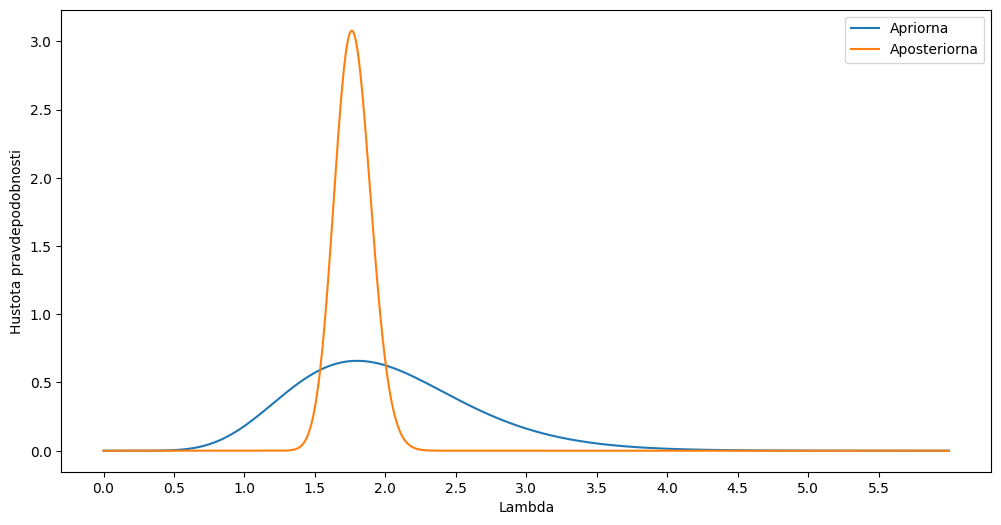

In [33]:
x = np.linspace(start=0, stop=6, num=1000)

# Vypocitanie apriornych a posteriornych hodnot alpha a beta
alpha = 10
beta = 5
n = len(df['uloha_1 a)'].dropna())
beta_post = beta + n
alpha_post = alpha + np.sum(df['uloha_1 a)'])

# Vypocitanie apriornych a posteriornych hustot pravdepodobnosti pomocou gamma rozdelenia
# (Beta je inverzna hodnota scale theta)
prior_density = gamma.pdf(x, a = alpha, scale = 1/beta)
posterior_density = gamma.pdf(x, a = 10 + alpha_post, scale = 1/beta_post)

# Vykreslenie grafu
plt.figure(figsize=(12, 6))
plt.plot(x, prior_density, label='Apriorna')
plt.plot(x, posterior_density, label='Aposteriorna')
plt.xticks(np.arange(0, 6, 0.5))
plt.xlabel('Lambda')
plt.ylabel('Hustota pravdepodobnosti')
plt.legend()
plt.show()

2. Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní
𝑥 za jeden časový interval.

Výsledný graf bude pre diskrétne hodnoty x. Y hodnoty vykreslíme pomocou negatívnej binomickej distribúcie, ktorej vstupom bude: $$NB(\tilde{x}|\alpha,\space\frac{\beta}{1+\beta})$$

Kedže už mám $\alpha$ a $\beta$ pre apriornú aj aposteriornú hustotu vypočítané, tak ich len vložím do funkcie a výsledné hodnoty vykreslím.

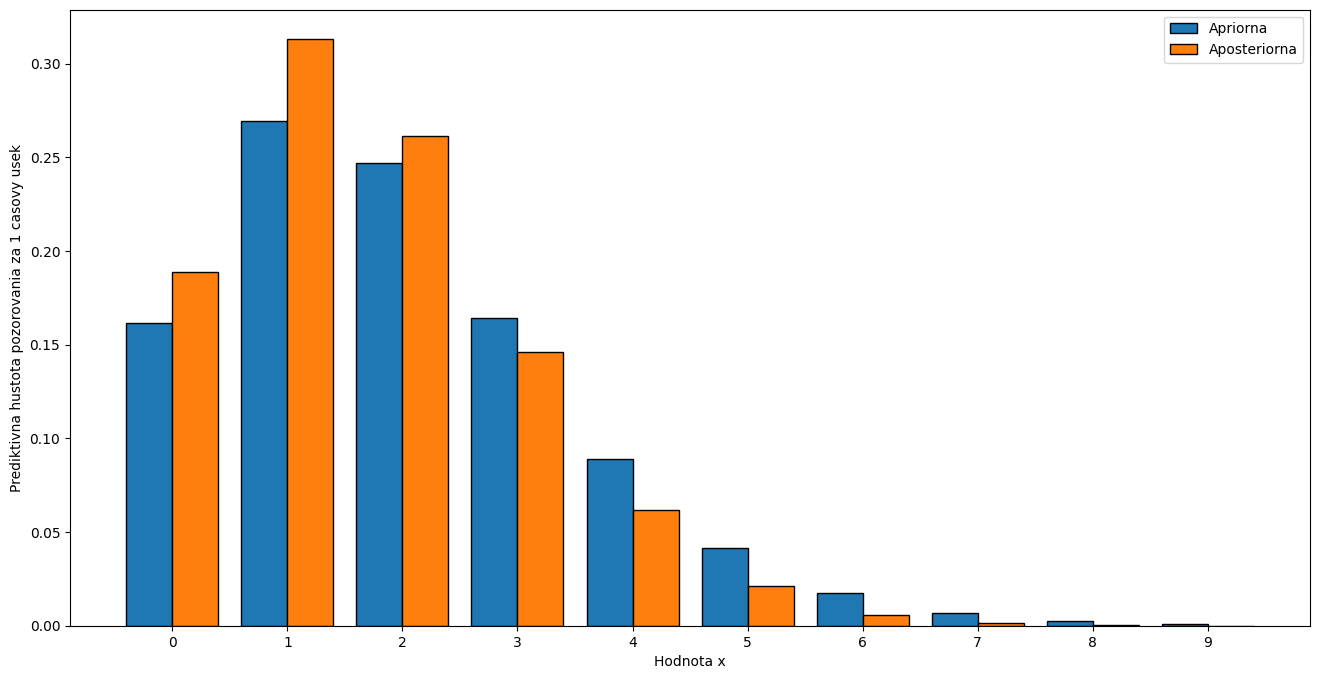

In [35]:
x = np.arange(0, 10)

# Vypocitanie vysledkov funkcie pre apriornu aj
# aposteriornu hustotu pozorovania za 1 casovy usek
prior_NB = nbinom.pmf(x, alpha, beta/(beta+1))
posterior_NB = nbinom.pmf(x, alpha_post, beta_post/(beta_post+1))

# Vykrelenie grafu
plt.figure(figsize=(16,8))
plt.bar(x - 0.2, prior_NB, label='Apriorna', width=0.4, edgecolor='black')
plt.bar(x + 0.2, posterior_NB, label='Aposteriorna', width=0.4, edgecolor='black')
plt.xlabel('Hodnota x')
plt.xticks(x)
plt.ylabel('Prediktivna hustota pozorovania za 1 casovy usek')
plt.legend()
plt.show()

3. Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního
rozdělení a porovnejte je

Intervaly získam pomocou funkcie, do ktorej vložím $\alpha$ a $\beta$ a zvolím si požadovaný interval.

Interval podľa apriórneho rozdelenia je omnoho širší ako podľa aposteriórneho rozdelenia. To znamená že po pridaní aposteriórnej informácie vieme omnoho presnejšie predpokladať hodnotu parametru $\lambda$, ktorý podľa nášho výpočtu by sa mal na 95% nachádzať v intervale (1.4376938284869922, 1.9327207471868797).

In [37]:
prior_interval = gamma.interval(0.95, a=alpha, scale=1/beta)

posterior_interval = gamma.interval(0.95, a=alpha_post, scale=1/beta_post)

print("Apriorny interval spolahlivosti 95%:", prior_interval)
print("Aposteriorny interval spolahlivosti 95%:", posterior_interval)


Apriorny interval spolahlivosti 95%: (0.9590777392264868, 3.416960690283833)
Aposteriorny interval spolahlivosti 95%: (1.4376938284869922, 1.9327207471868797)


4. Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte
jejich výběr.

Vybral som si priemernú hodnotu lambdy - mean a najčastejšie vyskytovanú hodnotu lambdy (Modus) - mode.

Mean sa vypočíta jednoducho a teda počet pripojení deleno časový úsek. V našom prípade teda $\frac{\alpha}{\beta}$ z aposteriórnej distribúcie.

Mode z gamma distribúcie sa počíta pomocou vzorca $\frac{\alpha - 1}{\beta}$ a výsledná hodnota znázorňuje najpravdepodobnejšiu hodnotu $\lambda$ a teda korešponduje s vrcholom distribučnej funkcie.

Hodnoty si sú celkom podobné kedže sa počítajú podobným vzorcom a máme dostatočný počet nameraných hodnôt na to, aby -1 vo vzorci na mode nespravila masívny rozdiel vo výsledku. Pri pohľade na graf distribučnej funkcie pravdepodobnosti sa čísla zdajú byť správne.


In [38]:
mean = alpha_post/beta_post
mode = (alpha_post - 1)/beta_post

mean, mode

(1.6761904761904762, 1.6666666666666667)

5. Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je.

Vybral som si priemerné hodnoty v oboch prípadoch. Ich výpočet pri diskrétnych hodnotách bude: $$\frac{\sum^n_{i=1}(y_i*x_i)}{\sum^n_{i=1}y_i}$$

Tieto hodnoty niesú úplne presné, kedže na úplnú presnosť by bolo potrebné takto spočítať sumu pre všetky možnosti pozorovania na časový interval a teda pre nekonečne veľa možností. Avšak sú dostatočne presné aj v mojom výpočte.

Tieto hodnoty sa už od seba výraznejšie líšia a je to vidieť aj na grafe. Je to spôsobené zvýšenou presnosťou odhadu $\lambda$ po pridaní aposteriórnych informácií. 

In [41]:
mean_prior = np.sum(prior_NB * x) / np.sum(prior_NB)
mean_posterior = np.sum(posterior_NB * x) / np.sum(posterior_NB)

mean_prior, mean_posterior

(1.997038050619329, 1.6760830755702019)

### 1b) Aproximace diskrétním rozdělením

1. Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

Výpočet všetkých hustôt som rozdelil do viacerých častí pre zlepšenie prehľadu nad postupom výpočtu.

V prvej časti si uložím hodnoty premenných odseknutého normálneho rozdelenia, ktoré sú v zadaní úlohy. Ďaľším krokom je nájdenie a uloženie maximálnych hodnôt trvania procesu z každej skupiny pozorovania. 

In [42]:
# Ulozenie premennych zo zadania ulohy
mu = 3
sigma = 1
a = 1
a_norm = (a - mu) / sigma

# Najdenie maximalnej skupiny a predpripavenie premennej,
# do ktorej sa ulozia maximalne hodnoty
max_skupina = max(df['skupina'])
max_prior = np.zeros(max_skupina+1)

# Prechod cez kazdu skupinu dataframu, pre kazdu skupinu sa najde
# maximalna hodnota merania a ulozi sa do premennej na prislusnu poziciu
for skupina in range(max_skupina+1):
    max_inGroup = max(df[df['skupina'] == skupina]['uloha_1 b)_prior'])
    max_prior[skupina] = max_inGroup

V ďalšej časti sa vypočíta apriorná hustota pomocou binningu a histogramu nad maximálnymi hodnotami meraní. V intervale nameraných maximálnych hodnôt si vytvorím 100 košov (binov). Každý bin znamená $\frac{1}{100}$ tohto intervalu. Ak sa hodnota z merania nachádza v konkrétnom intervale binu, tak sa inkrementuje hodnota binu. Výsledok z histogramu bude 100 diskrétnych hodnôt, pričom každá hodnota bude znázorňovať počet nameraných maximálnych hodnôt v danom intervale binu. Pre získanie hustoty je ešte potrebné každú hodnotu binu vydeliť počtom všetkých nameraných maximálnych hodnôt.

Z každého binu si vyberiem reprezentanta, napríklad hodnotu v strede intervalu. Tento reprezentant bude na grafe znázorňovať percentuálnu hustotu pravdepodobnosti pre svoj bin.

In [47]:
#Vypočítanie histogramu pre 100 binov
hist, bin_edges = np.histogram(max_prior, bins=100)

# Vypocitanie sirky binu pre zobranie na grafe
bin_width = bin_edges[1] - bin_edges[0]

# Vypocet hustoty pravdepodobnosti
hist = hist / np.sum(hist)

# Zvolenie reprezentatov pre kazdy bin
# (bin_edge[0]+bin_edge[1])/2 , (bin_edge[1]+bin_edge[2])/2, ...)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

V poslednej časti vypočítam funkciu vierohodnosti a aposteriórnu hustotu.

Funkcia vierohodnosti sa počíta pre každý parameter b zvlášť. Hodnota pre každé b je produktom všetkých odseknutých normálových rozdelení pre každú hodnotu z aposteriórnych meraní. Vzorec na výpočet je tento: $$L_{b_i} = \prod_{j=1}^nTN(post_j, a_{norm}, b_{i_{norm}}, \mu, \sigma), \space a_{norm} = \frac{a-\mu}{\sigma}, \space b_{i_{norm}} = \frac{b_i - \mu}{\sigma}$$

Výsledné hodnoty sú veľmi malé a je treba ich normalizovať predelením sumov všetkých hodnôt pred použitím.

Aposteriórna hodnota je výsledkom vynásobenia apriórnej hustoty a funkcie vierohodnosti. Jej výslednú hodnotu je tiež potrebné normalizovať. 

In [48]:
# Priprava aposteriornych hodnot pre vypocet vierohodnostnej funkcie
posterior = df['uloha_1 b)_pozorování'].dropna()

# Priprava premennej, do ktorej sa ulozi vierohodnostna funkcia,
# ktora je rovnako velka ako pocet binov
likelihood = np.zeros(len(bin_centers))

# Vypocet vierohodnostnej funkcie pre kazdy bin
for i in range(len(likelihood)):
    # Vypocet b_norm pre kazdy bin
    b_norm = (bin_centers[i] - mu) / sigma
    # Vypocet vierohodnostnej funkcie pre kazdy bin
    likelihood[i] = np.prod([truncnorm.pdf(x, a_norm, b_norm, loc=mu, scale=sigma) 
                                for x in posterior])
# Normalizacia vysledkov vierohodnostnej funkcie
likelihood = likelihood / np.sum(likelihood)

#Vypocet aposteriornej hustoty
posterior_func = hist * likelihood
# Normalizacia aposteriornej hustoty
posterior_func = posterior_func / np.sum(posterior_func)

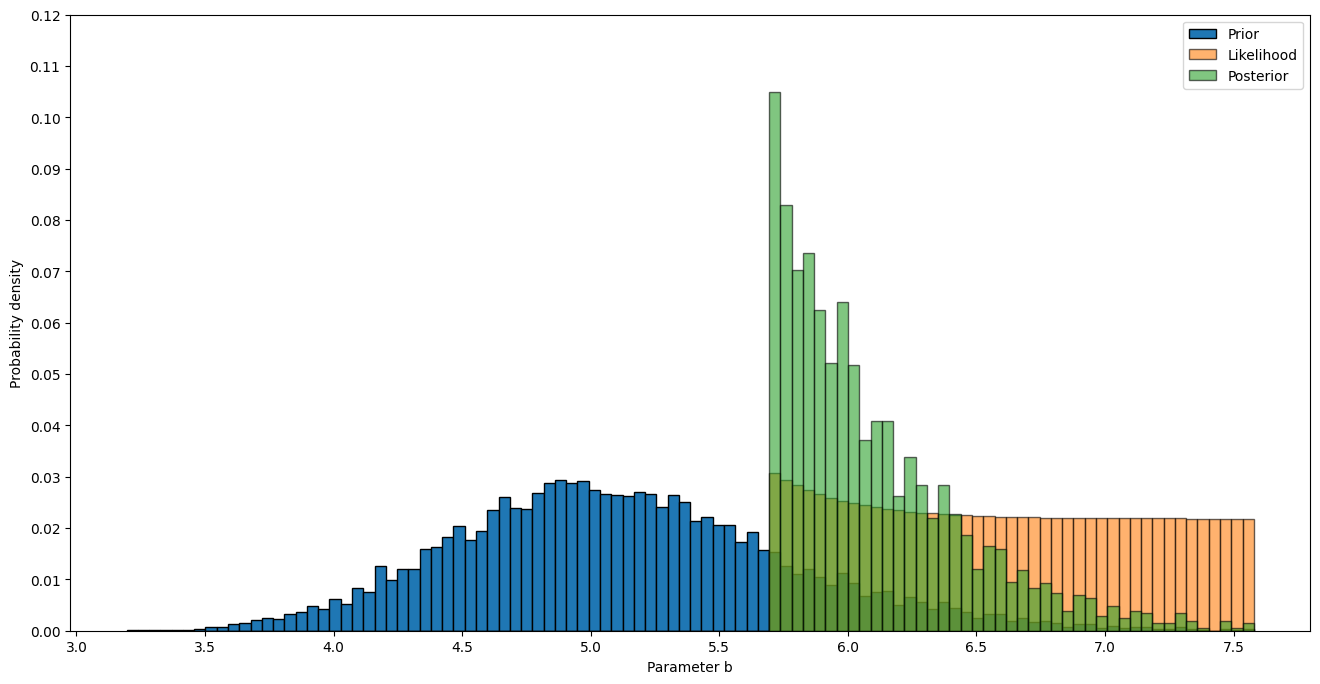

In [45]:
# Vykreslenie grafu
plt.figure(figsize=(16, 8))
plt.bar(bin_centers, hist, width=bin_width, label='Prior', edgecolor='black')
plt.bar(bin_centers, likelihood, width=bin_width, label='Likelihood', 
        edgecolor='black', alpha=0.6)
plt.bar(bin_centers, posterior_func, width=bin_width, label='Posterior', 
        edgecolor='black', alpha=0.6)
plt.xlabel('Parameter b')
plt.ylabel('Probability density')
plt.xticks(np.arange(3, 8, 0.5))
plt.yticks(np.arange(0, 0.126, 0.01))
plt.legend()
plt.show()

2. Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.

Kedže nemôžem použiť funkciu na výpočet parametru ako v predchádzajúcej úlohe, vytvoril som algoritmus na výpočet intervalu aposteriórnej hustoty.

Sčítavam zľava doprava pravdepodobnosti, kedže sú normalizované tak len kontrolujem kedy suma prejde cez 2,5% a 97,5% na naplnenie 95% intervalu. Ked sa tieto hodnoty naplnia tak si uložím index a vytiahnem hodnoty parametru b na týchto hodnotách. Tieto vybrané hodnoty parametru b sa stanú krajmi 95% intervalu spoľahlivosti pre parameter b. 

In [50]:
# Premenne pre vypocet 95% intervalu spolahlivosti
sum_posterior = 0
lower_index = None
upper_index = None

# Prechod cez kazdu hodnotu aposteriornej funkcie
for i in range(len(posterior_func)):
    # Pripocitanie hodnoty aposteriornej funkcie
    sum_posterior += posterior_func[i]
    # Ak je suma vacsia ako 0.025 a zatial nie je urcena dolna hranica, tak sa ulozi index
    if sum_posterior >= 0.025 and lower_index == None:
        lower_index = i
    # Ak je suma vacsia ako 0.975 a zatial nie je urcena horna hranica, tak sa ulozi index
    if sum_posterior >= 0.975 and upper_index == None:
        upper_index = i-1
        break
# Vytiahnutie hodnot dolnej a hornej hranice z bin_centers
lower_bound = bin_centers[lower_index]
upper_bound = bin_centers[upper_index]
    
print("Aposteriorny 95% interval spolahlivosti:", (lower_bound, upper_bound))

Aposteriorny 95% interval spolahlivosti: (5.715632004851798, 6.986990651678344)


3. Vyberte dva bodové odhady parametru 𝑏 a spočítejte je

Vybral som si znova priemer a modus.

Priemer počítam znova ako: $$\frac{\sum_{i=1}^n(b_i * apost_i)}{\sum_{i=1}^n(apost_i)}$$

A modus vyberam ako b parameter pri najvačšej hodnote aposteriórnej hustoty pravdepodobnosti.

In [53]:
mean = np.sum(bin_centers * posterior_func) / np.sum(posterior_func)
mode = bin_centers[np.argmax(posterior_func)]

mean, mode

(6.094990196614115, 5.715632004851798)

## Úloha 2: Regresia

1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).



Import knižníc, ktoré využijem pri tvorbe modelu.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.linear_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Nacitanie dat z xlsx suboru pre 2. úlohu.

In [63]:
file_path = "projekt-2_Data.xlsx"
df = pd.read_excel(file_path, sheet_name='Úloha 2')
df

,OSType,ActiveUsers,InteractingPct,ScrollingPct,Ping [ms]
0,iOS,4113,0.8283,0.1717,47
1,iOS,7549,0.3461,0.6539,46
2,Windows,8855,0.2178,0.7822,55
3,Android,8870,0.0794,0.9206,56
4,MacOS,9559,0.7282,0.2718,76
...,...,...,...,...,...
497,iOS,5315,0.1974,0.8026,28
498,MacOS,1392,0.2373,0.7627,24
499,iOS,6014,0.8112,0.1888,54
500,Android,5118,0.2345,0.7655,39


Rozdelenie hodnôt z datasetu do nezávislých a závislých hodnôt.

Závyslé hodnoty sú len Ping stĺpec, čiže hodnoty ktoré bude model predpovedať a na ktorých sa bude učiť.

Nezávislé sú všetky ostatné, teda hodnoty podľa ktorých sa budú vyhodnocovať závislé hodnoty.

Následne je potrebné kategorický stĺpec "OSType" rozdeliť na viacero dummy stĺpcov, každý stĺpec zastupujúci jeden z operačných systémov. Hodnota v dummy stĺpcy sú true ak bolo dané meranie merané na operačnom systéme stĺpca. Aj keď boli merania robené na 4 operačných systémoch stačí vytvoriť len 3 dummy stĺpce, kedže 4 stĺpec sa dá odvodiť podľa hodnôt v predchádzajúcich 3 stĺpcoch.

Pred vytvorením modelu ešte odstránim stĺpec "ScrollingPct", kedže to je len hodnota 1 - "InteractingPct" a je teda závislá na danom stĺpci.

In [64]:
# Rozdelenie datasetu na nezavisle a zavisle premenne
x = df[['OSType', 'ActiveUsers', 'InteractingPct', 'ScrollingPct']]
y = df['Ping [ms]']

# Vytvorenie dummy premennych pre kategoricke premenne
x = pd.get_dummies(x, dtype=int, prefix="", prefix_sep="", drop_first=True)

# Vymazanie zbytocneho stlpca scrollingPct
x.drop(['ScrollingPct'], axis=1, inplace=True)
x

,ActiveUsers,InteractingPct,MacOS,Windows,iOS
0,4113,0.8283,0,0,1
1,7549,0.3461,0,0,1
2,8855,0.2178,0,1,0
3,8870,0.0794,0,0,0
4,9559,0.7282,1,0,0
...,...,...,...,...,...
497,5315,0.1974,0,0,1
498,1392,0.2373,1,0,0
499,6014,0.8112,0,0,1
500,5118,0.2345,0,0,0


Pomocou funkcie "PolynomialFeatures" a následne cez metódu vytvoreného objektu získam automaticky všetky interakcie druhého radu a mocniny druhého rádu. Pomocou ďaľšej metódy si viem vytiahnuť aj názvy všetkých stĺpcov podľa názvov stĺpcov v originálnom datasete.

In [65]:
poly = PolynomialFeatures(degree=2, include_bias=True)

poly_x = poly.fit_transform(x)
poly_x_columns = poly.get_feature_names_out(x.columns)
poly_x_columns

array(['1', 'ActiveUsers', 'InteractingPct', 'MacOS', 'Windows', 'iOS',
       'ActiveUsers^2', 'ActiveUsers InteractingPct', 'ActiveUsers MacOS',
       'ActiveUsers Windows', 'ActiveUsers iOS', 'InteractingPct^2',
       'InteractingPct MacOS', 'InteractingPct Windows',
       'InteractingPct iOS', 'MacOS^2', 'MacOS Windows', 'MacOS iOS',
       'Windows^2', 'Windows iOS', 'iOS^2'], dtype=object)

Definujem si funkciu na automatickú backwards elimináciu.

Zvolím si kontrolnú úroveň významnosti na 5 %.

Natrénujem si regresný model na vsetkých stĺpcoch. Pre každý stĺpec si vytiahnem úrovne významnosti (p-values). Ak sú úrovne významnosti NaN tak automaticky odstraňujem stĺpec. Následne nájdem stĺpec s najvačšou úrovňou významnosti a ak je väčšia ako kontrolná úroveň významnosti tak odstránim stĺpec. Tento proces opakujem až dovtedy, kým maximálna hodnota úrovne významnosti nebude menšia ako kontrolná hodnota. Stĺpce, ktoré prežijú elimináciu vraciam z funkcie nazad spoločne s indexami týchto stĺpcov.

In [66]:
def autoBackwardsElim(x, y):
    # Zvolenie kontrolnej hladiny vyznamnosti
    p = 0.05
    # Vytvorenie pola pre indexy stlpcov a indexov NAN hodnot
    Cols = np.arange(0, x.shape[1])
    NANs = []

    while True:
        # Vyfiltrovanie stlpcov podla indexov
        x_test = x[:, Cols]
        # Vytvorenie modelu a vybranie p hodnot
        OLS = sm.OLS(endog=y, exog=x_test).fit()
        p_values = OLS.pvalues

        # Odstranenie NAN hodnot
        for i in range(len(p_values)):
            if p_values[i] != p_values[i]:
                NANs.append(i)
        Cols = np.delete(Cols, NANs)
        NANs = []
        
        # Ak je najvyssia p hodnota vacsia ako kontrolna hladina vyznamnosti,
        # tak sa odstrani stlpec s najvyssou p hodnotou
        if max(p_values) > p:
            Cols = np.delete(Cols, np.argmax(p_values))
        else:
            break
    return x[:, Cols], Cols

Vytvorenie modelu a vypísanie prehľadu.

Na začiatku si vyfiltrujem stĺpce pomocou backwards eliminácie. Potom si vytvorím dataset s vyfiltrovanými stĺpcami, názvy stĺpcov vyfiltrujem indexami stĺpcov.

Následne si natrénujem model na výslednom datasete a závislej premennej a vytlačím prehľad.

In [67]:
# Filtrovanie stlpcov pomocou funkcie autoBackwardsElim
BE_poly_x, Cols = autoBackwardsElim(poly_x, y)

# Vytvorenie dataframe z filtrovanych stlpcov
X = pd.DataFrame(BE_poly_x, columns=poly_x_columns[Cols])

# Natrenovanie modelu
lmBE = sm.OLS(endog=y, exog=X).fit()

# Tlac prehladu modelu
print(lmBE.summary())

                                 OLS Regression Results                                
Dep. Variable:              Ping [ms]   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4927.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):                        0.00
Time:                        01:58:23   Log-Likelihood:                         -1599.8
No. Observations:                 502   AIC:                                      3216.
Df Residuals:                     494   BIC:                                      3249.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

Z následného prehľadu vieme zistiť rovnicu modelu pomocou koeficientu pri každom stĺpci.

$$Predict = 0.0101 * AU + 34.9018 * IP + 3.7671 * Win + -4.28e^{-7} * AU^2 - 0.032 * (AU * IP) + $$ 
$$ 0.0017 * (AU * Mac) - 0.0007 * (AU * Win) - 0.0011 * (AU * iOS) + 3.7671 * Win^2$$

Priemerná odmocnina odchylky medzi predikovanými hodnotami modelu a reálnymi hodnotami

In [69]:
predBE = lmBE.predict(X.values)

print("Priemerna odmocnina odchylky: ", np.sqrt(mean_squared_error(y, predBE)))


Priemerna odmocnina odchylky:  5.85888214373854


Odchylka medzi predikovanými hodnotami a reálnymi hodnotami nieje veľmi veľká vzhľadom na počet pozorovaní pri tréningu. Pri zvýšení tréningových dát by bolo možné dosiahnuť aj nižšie hodnoty

3D graf výsledkov modelu pre každú možnosť ActiveUsers, InteractivePct a OSType

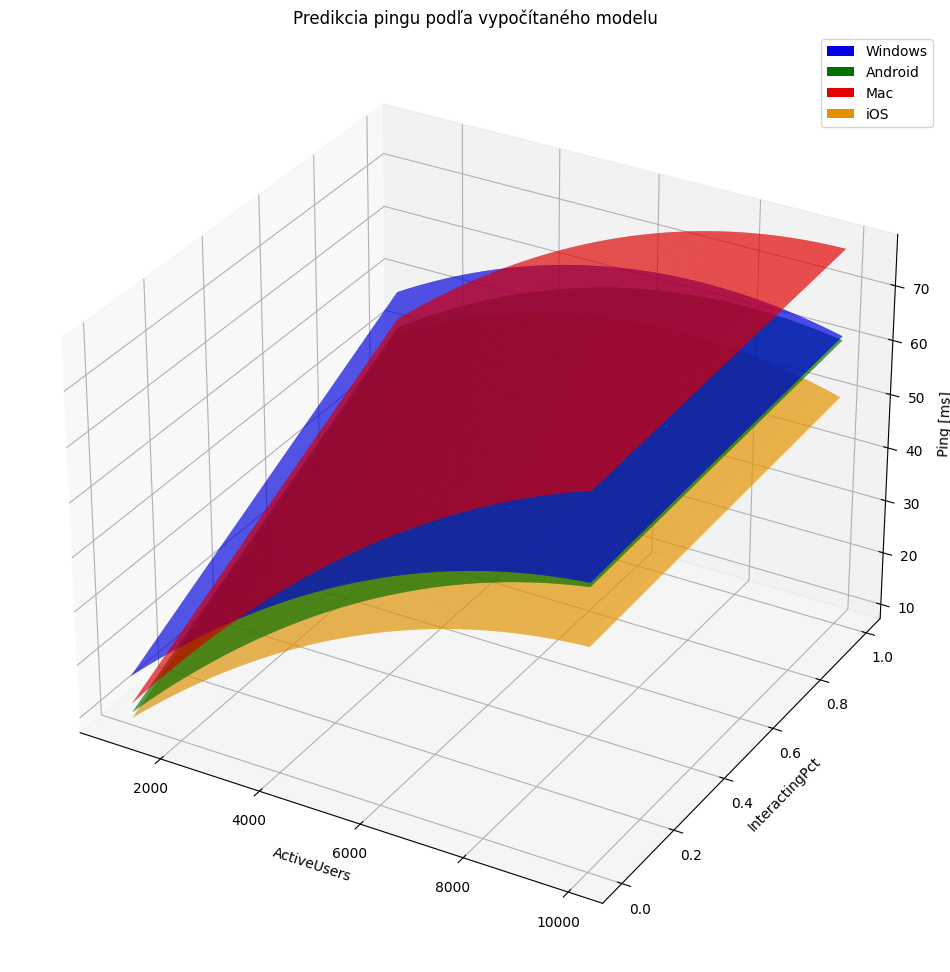

In [70]:
ax = plt.figure(figsize=(12,15)).add_subplot(projection='3d')

# Vytvorenie mriezky pre predikciu
x1 = np.arange(1000, 10000, 10)
y1 = np.arange(0, 1, 0.01)
x1, y1 = np.meshgrid(x1, y1)
x1, y1 = x1.ravel(), y1.ravel()

# Vytvorenie dataframov pre kazdu kombinaciu nezavislych premennych
df_winplt = pd.DataFrame({'ActiveUsers': x1, 'InteractingPct': y1, 'Mac': np.zeros_like(x1),
                           'Windows': np.ones_like(x1), 'iOS': np.zeros_like(x1)})
df_andplt = pd.DataFrame({'ActiveUsers': x1, 'InteractingPct': y1, 'Mac': np.zeros_like(x1),
                           'Windows': np.zeros_like(x1), 'iOS': np.zeros_like(x1)})
df_macplt = pd.DataFrame({'ActiveUsers': x1, 'InteractingPct': y1, 'Mac': np.ones_like(x1),
                           'Windows': np.zeros_like(x1), 'iOS': np.zeros_like(x1)})
df_iosplt = pd.DataFrame({'ActiveUsers': x1, 'InteractingPct': y1, 'Mac': np.zeros_like(x1),
                           'Windows': np.zeros_like(x1), 'iOS': np.ones_like(x1)})

# Predikcia pingu pre kazdy dataframe
reswin = lmBE.predict(poly.fit_transform(df_winplt)[: , Cols])
resand = lmBE.predict(poly.fit_transform(df_andplt)[: , Cols])
resmac = lmBE.predict(poly.fit_transform(df_macplt)[: , Cols])
resios = lmBE.predict(poly.fit_transform(df_iosplt)[: , Cols])

# Vykreslenie grafu
ax.plot_trisurf(x1, y1, reswin, color='blue', label='Windows')
ax.plot_trisurf(x1, y1, resand, color='green', label='Android')
ax.plot_trisurf(x1, y1, resmac, color='red', label='Mac')
ax.plot_trisurf(x1, y1, resios, color='orange', label='iOS')

ax.set_title('Predikcia pingu podľa vypočítaného modelu')
ax.set_xlabel('ActiveUsers')
ax.set_ylabel('InteractingPct')
ax.set_zlabel('Ping [ms]')

ax.legend()

plt.show()

2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má
odezva nejproblematičtější hodnotu.

Pri vytiahnutí parametrov z maximálnej predikovanej hodnoty podľa nameraných hodnôt a z každej možnosti parametrov z grafu pre Mac (Mac graf je najvyššie zo všetkých) to vychádza že najproblematickejšia hodnota je pri vysokom počte užívateľov, ktorý čo najviac interagujú s aplikáciou a meriame na Macu.

In [74]:
max_pingP = predBE.argmax()
max_pingP_value = predBE[max_pingP]
max_pingP = x.iloc[max_pingP]

max_pingG = resmac.argmax()
max_pingG_value = resmac[max_pingG]
max_pingG = df_macplt.iloc[max_pingG]

max_pingP, max_pingG

(ActiveUsers       9657.000
 InteractingPct       0.973
 MacOS                1.000
 Windows              0.000
 iOS                  0.000
 Name: 10, dtype: float64,
 ActiveUsers       9990.00
 InteractingPct       0.99
 Mac                  1.00
 Windows              0.00
 iOS                  0.00
 Name: 89999, dtype: float64)

Ešte hodnota Pingu pri najhoršich parametroch.

In [75]:
max_pingP_value, max_pingG_value

(77.69765508804545, 77.8269350483883)

3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních
parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.

Na začiatku si vyfiltrujem dataset len pre užívateľov Windowsu. Vytvorím si nový dataset len s jedným riadkom s priemernými hodnotami, pre ktoré vypočítam poly hodnoty.

Priemerné hodnoty pošlem do modelu a výsledok si uložím.

Pre zistenie intervalu spoľahlivosti a predikčného intervalu použijem metódu "get_prediction" a z výsledného objektu vytiahnem hodnoty intervalov pre moje nastavenia.

In [83]:
# Vypocet priemernych hodnot pre pouzivatelov Windows a zistenie poly hodnot
df_win = x[x['Windows'] == 1]
mean_win = pd.DataFrame([df_win.mean().values], columns=poly_x_columns[1:6])
mean_win = poly.fit_transform(mean_win)
mean_win = mean_win[:, Cols]

# Predikcia pingu pre priemerneho pouzivatela Windows
win_pred = lmBE.predict(mean_win)

# Vypocet intervalov spolahlivosti a predikcie
predictions = lmBE.get_prediction(mean_win)
CI = predictions.conf_int(alpha=0.05)
PI = predictions.conf_int(alpha=0.05, obs=True)

print("Predikovaný ping pre priemerného užívateľa Windows: ", win_pred[0])
print("95% interval spolahlivosti: ", CI[0])
print("95% predikčný interval: ", PI[0])

Predikovaný ping pre priemerného užívateľa Windows:  54.8680474416546
95% interval spolahlivosti:  [53.7754244  55.96067049]
95% predikčný interval:  [43.21248515 66.52360973]


4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.

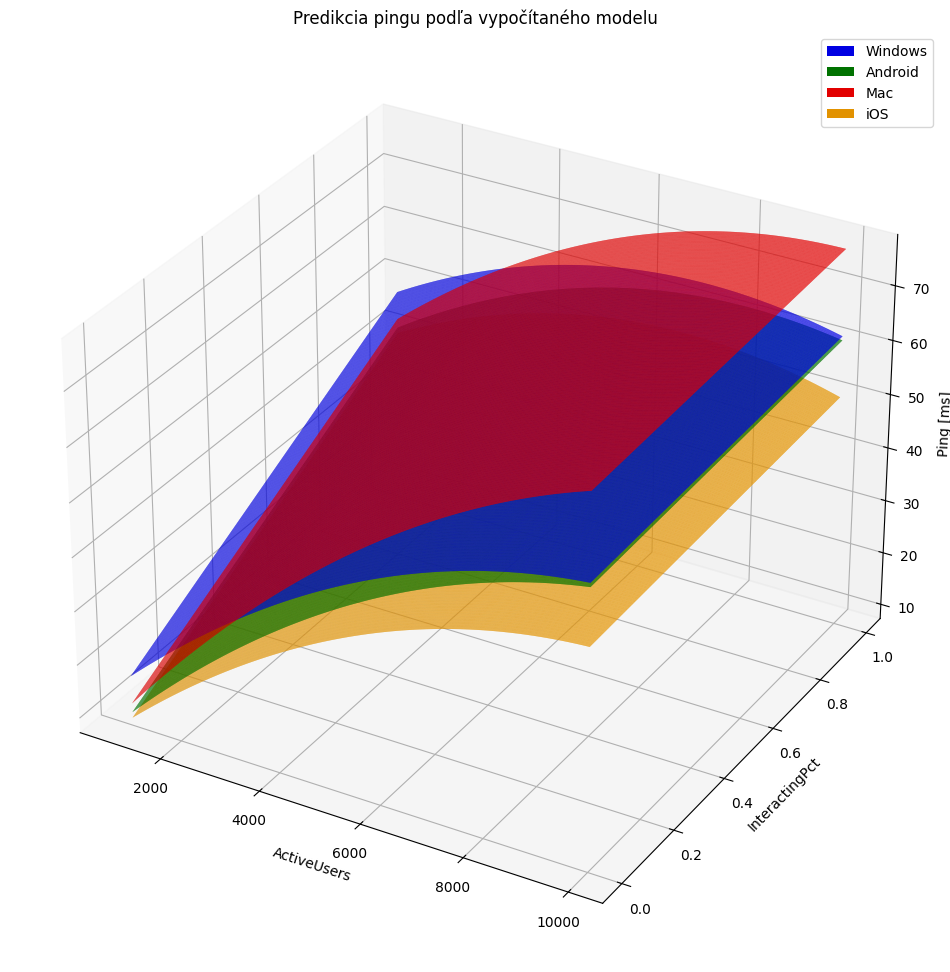

Na základe priemernej odmocniny odchylky = 5.85888214373854, priloženého grafu a prehľadu modelu si myslím že môj model môže byť vhodný pre ďaľšie použitie. 

Myslím si že výsledný model vyhovuje zadaniu a poskytuje celkom presnú predikciu Pingu. Avšak určite má nedostatky a môže byť lepší. Zlepšenie modelu môže nastať zvýšením tréningových dát alebo opravou prípadných chýb, ktoré som spravil pri zostavovaní modelu. Hlavný problém ktorý som si všimol a nevedel vyriešiť je že hodnota $R^2$ je príliš vysoká a teda nezávislé parametre sú na sebe v skutočnosti stále celkom závislé. Tento problém by sa dal riešiť elimináciou stĺpcov s vysokým VIF ale nepodarilo sa mi to implementovať s uspokojivým výsledkom.

Vo výsledku som s mojím modelom spokojný ale zároveň si uvedomujem že som mohol pri jeho tvorbe spraviť chybu a teda môže byť určite lepši.

In [84]:
print(lmBE.summary())

                                 OLS Regression Results                                
Dep. Variable:              Ping [ms]   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4927.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):                        0.00
Time:                        02:38:54   Log-Likelihood:                         -1599.8
No. Observations:                 502   AIC:                                      3216.
Df Residuals:                     494   BIC:                                      3249.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------